<a href="https://colab.research.google.com/github/dev-anshu-singh/Classical-ML-Algorithms/blob/main/KMeansAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
class K_Means:
    def __init__(self, k=2, tolerance=0.001, max_iter=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iter

    def euclidean_distance(self, point_1, point_2):
        return np.linalg.norm(np.array(point_1) - np.array(point_2))

    def k_meansPlusPlus_init(self, data, k):
        if not isinstance(data, np.ndarray):
            raise ValueError("Input data must be a NumPy array.")

        n_samples = data.shape[0]
        centroids = {}

        # Select the first centroid randomly
        first_centroid_index = np.random.randint(n_samples)
        centroids[0] = data[first_centroid_index]

        for i in range(1, k):
            # Compute the distances from the closest centroid
            distances = np.min([np.linalg.norm(data - c, axis=1)**2 for c in centroids.values()], axis=0)

            # Compute probabilities
            probabilities = distances / np.sum(distances)

            # Select the next centroid
            next_centroid_index = np.random.choice(n_samples, p=probabilities)
            centroids[i] = data[next_centroid_index]

        return centroids

    def fit(self, data):
        if not isinstance(data, np.ndarray):
            raise ValueError("Input data must be a NumPy array.")

        n_samples, n_features = data.shape
        self.centroids = self.k_meansPlusPlus_init(data, self.k)

        for _ in range(self.max_iterations):
            self.classes = {i: [] for i in range(self.k)}

            # Assign each point to the closest centroid
            for point in data:
                distances = [self.euclidean_distance(point, self.centroids[index]) for index in self.centroids]
                cluster_index = np.argmin(distances)
                self.classes[cluster_index].append(np.array(point))

            previous_centroids = dict(self.centroids)

            # Update centroids
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis=0)

            # Check for convergence
            isOptimal = True
            epsilon = 1e-8
            for centroid in self.centroids:
                original_centroid = previous_centroids[centroid]
                curr_centroid = self.centroids[centroid]
                if np.sum((curr_centroid - original_centroid) / (original_centroid + epsilon) * 100) > self.tolerance:
                    isOptimal = False

            if isOptimal:
                break

        return self.centroids, self.classes


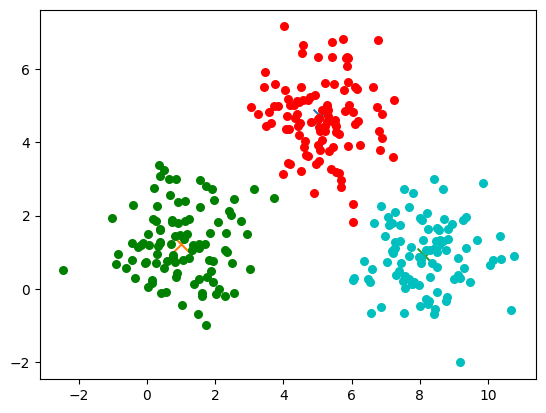

In [60]:
def main():
    K=3
    center_1 = np.array([1,1])
    center_2 = np.array([5,5])
    center_3 = np.array([8,1])

    # Generate random data and center it to the three centers
    cluster_1 = np.random.randn(100, 2) + center_1
    cluster_2 = np.random.randn(100,2) + center_2
    cluster_3 = np.random.randn(100,2) + center_3

    data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)

    k_means = K_Means(K)
    k_means.fit(data)


    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color = color,s = 30)

if __name__ == "__main__":
    main()